In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
profits = np.array([135,139,149,150,156,163,173,184,192,201,210,214,221,229,240])
weights = np.array([70,73,77,80,82,87,90,94,98,106,110,113,115,118,120])
capacity = 750

## 穷举搜索最优解

In [4]:
max_profit = 0
best_solution = None
for i in range(2**15):
    s = bin(i)[2:]  # type: string
    s = s + '0' * (15 - len(s))     # padding to length=15
    solution = np.array(list(s)).astype(int)
    w = solution.dot(weights)
    if w > capacity:
        continue
    else:
        p = solution.dot(profits)
        if p > max_profit:
            max_profit = p
            best_solution = solution
        else:
            pass

print("Best solutions:", best_solution)
print("Maximum profit:", max_profit)
print("Total weights:", best_solution.dot(weights))

Best solutions: [1 0 1 0 1 0 1 1 1 0 0 0 0 1 1]
Maximum profit: 1458
Total weights: 749


## SA

In [5]:
solution = np.zeros(15,dtype=int)
p = 0
p_step = [0]
max_profit = 0
best_solution = None
w = 0

T = 300
decay_rate = 0.995
max_steps = 1000

for step in range(max_steps):
    index = np.random.randint(low=0,high=15)

    if solution[index] == 0:
        if w + weights[index] > 750:
            pass
        else:
            solution[index] = 1
            p += profits[index]
            w += weights[index]
    else:
        if np.random.random() < np.exp(-1*profits[index]/T):
            solution[index] = 0
            p -= profits[index]
            w -= weights[index]
        else:
            pass

    p_step.append(p)
    if p > max_profit:
        max_profit = p
        best_solution = solution.copy()
    T *= decay_rate

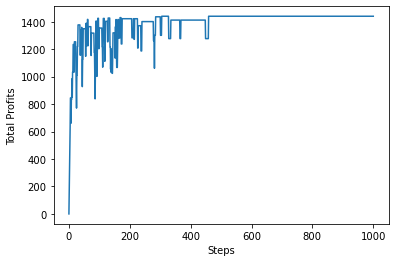

In [6]:
plt.plot(p_step)
plt.xlabel("Steps")
plt.ylabel("Total Profits")
plt.savefig("./figs/knapsack_SA")

In [7]:
print("Best solution:", best_solution)
print("Maximum profit:", max_profit)
print("Total weights:", best_solution.dot(weights))

Best solution: [0 1 1 1 1 1 0 0 0 0 0 1 0 1 1]
Maximum profit: 1440
Total weights: 750


## Tabu

In [8]:
pwr = profits/weights   # profits weights ratio
tabu = np.zeros(15, dtype=int)   # tabu list
lifetime = 5
max_steps = 100

solution = np.zeros(15,dtype=int)
p = 0
p_step = [0]
max_profit = 0
best_solution = None
w = 0

for step in range(max_steps):
    feasible =  ((w+weights)<=750) & (tabu==0) & (solution==0)  # whether 15 items are available
    if feasible.any():
        inds = feasible.nonzero()[0]    # index of available items
        best = pwr[inds].argmax()   # find which item has maximum pwr
        i = inds[best]  # get the index of the item
        solution[i] = 1     # choose the item i
        w += weights[i]
        p += profits[i]
    else:
        candidate = (tabu==0) & (solution==1)   # whether 15 items can be dropped
        inds = candidate.nonzero()[0]
        best = pwr[inds].argmin()
        i = inds[best]
        solution[i] = 0
        w -= weights[i]
        p -= profits[i]
    assert p==solution.dot(profits)
    p_step.append(p)
    if p > max_profit:
        max_profit = p
        best_solution = solution.copy()
    tabu[tabu>0] -= 1
    tabu[i] = lifetime

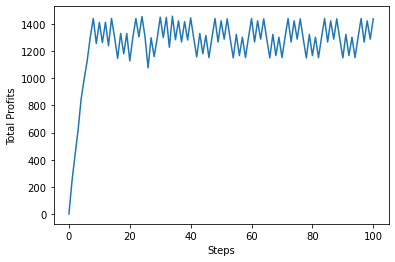

In [9]:
plt.plot(p_step)
plt.xlabel("Steps")
plt.ylabel("Total Profits")
plt.savefig("./figs/knapsack_tabu")

In [10]:
print("Best solution:", best_solution)
print("Maximum profit:", max_profit)
print("Total weights:", best_solution.dot(weights))

Best solution: [1 0 1 0 1 0 1 1 1 0 0 0 0 1 1]
Maximum profit: 1458
Total weights: 749
